In [1]:
from __future__ import print_function, division

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



0 = all messages are logged (default behavior)
1 = INFO messages are not printed
2 = INFO and WARNING messages are not printed
3 = INFO, WARNING, and ERROR messages are not printed

In [2]:
names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.csv', names=names)

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Describe DataFrame, to see some statistical info 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Check if there are any Nan values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [7]:
#Group by class, and count values to distribution
df.groupby('class').count()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [8]:
#Use corr method to se correlation  of columns
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


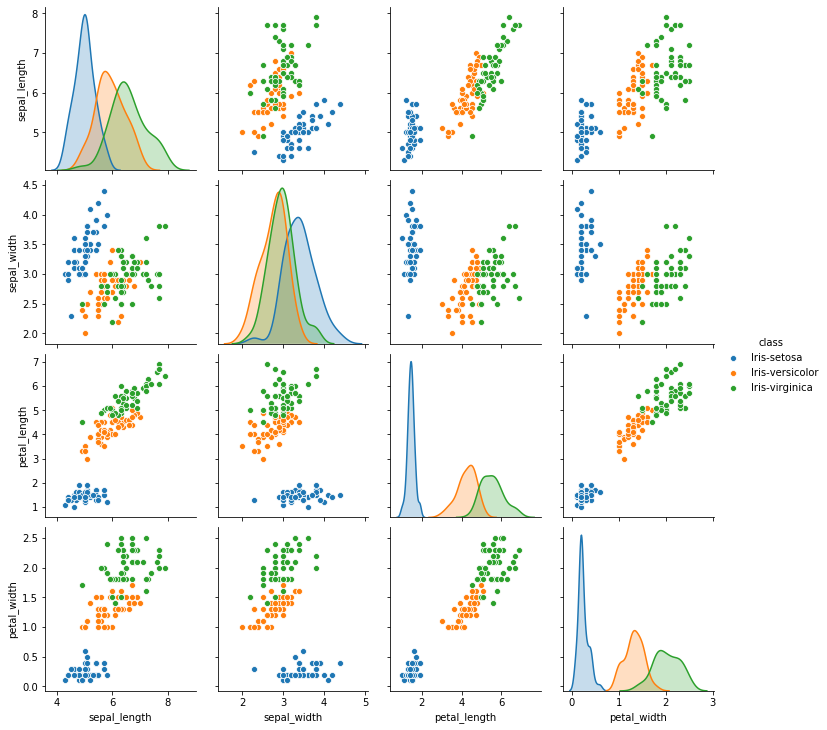

In [9]:
sns.pairplot(df, hue='class')

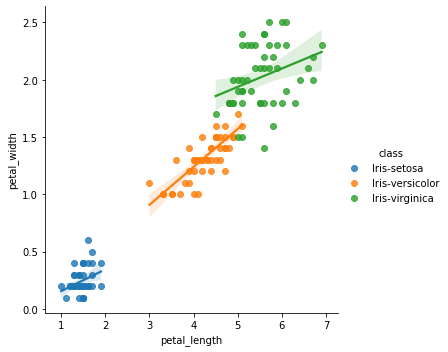

In [10]:
sns.lmplot(x='petal_length', y='petal_width', data=df,
           hue='class')

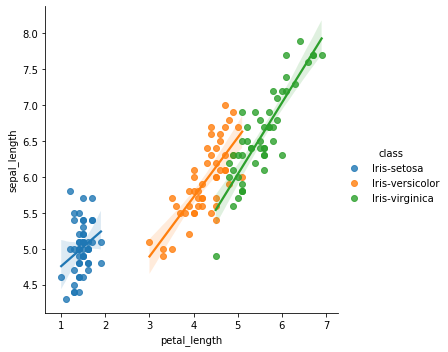

In [11]:
sns.lmplot(x='petal_length', y='sepal_length', data=df,
           hue='class')

In [12]:
#Change data in column class, to be represented by numerical values
df['class'] = pd.Categorical(df['class'])
df['class'] = df['class'].cat.codes

In [13]:
#put our target df['class'] to df_y
df_y = df.pop('class')

#split our dataframe and dataframe with target
df_train, df_eval, y_train, y_eval = train_test_split(df, df_y, test_size=0.2)


In [14]:
#change y_train from int8 to int32, because of tensorflow error
y_train = y_train.astype('int32')
y_eval = y_eval.astype('int32')
y_train.dtypes
y_eval.dtypes

dtype('int32')

In [15]:
#define input function to feed moel with data

def input_fn(features, labels, training=True, batch_size=32,  num_epochs=1):
        # Convert the inputs to a Dataset.
        dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

        # Shuffle and repeat if you are in training mode.
        if training:
            dataset = dataset.shuffle(1000).repeat(num_epochs)
    
        return dataset.batch(batch_size)
    
def predict_fn(features, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)
    
    return dataset


In [16]:
#Make train and test function to pass it to classifire
#

train_fn = lambda: input_fn(df_train, y_train, training=True, num_epochs=10)
eval_fn = lambda: input_fn(df_eval, y_eval, training=False)

In [17]:
#Make features columns, to pass it to classifier
#Tworzymy liste kolumn z opisem dla klasyfikatora

my_feature_columns = []
for feature_name in df_train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key = feature_name, dtype=tf.float64))
print(my_feature_columns)

[NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None), NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None), NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None), NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None)]


In [18]:
tf.keras.backend.set_floatx('float32')

linear_est = tf.estimator.LinearClassifier(feature_columns=my_feature_columns, n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpie6j5ojp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:
linear_est.train(train_fn)
result = linear_est.evaluate(eval_fn)

#clear_output()  # clears console output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model
print(result)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorf

In [20]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]



prediction_fn = lambda: predict_fn(predict)

#Run prediction estimator that returns function lambda, that returns: tf.data.Dataset
predictions = linear_est.predict(prediction_fn)

Please type numeric values as prompted.
sepal_length: 1.1
sepal_width: 1.2
petal_length: 1.1
petal_width: 1.4


In [21]:
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
for x in predictions:
    class_id = x['class_ids'][0]
    #probability = pred_dict['probabilities'][class_id]
    probability = x['probabilities'].max()

    print('Prediction is "{}" ({:.1f}%)'.format(
           SPECIES[class_id], 100 * probability))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpie6j5ojp/model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Virginica" (51.5%)
